In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn import preprocessing

In [2]:
train_set = pd.read_csv("car_data.csv")

In [3]:
train_set.describe(include="all")

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,516,NaN,NaN,NaN
mean,500.500000,NaN,40.106000,72689.000000,0.402000
std,288.819436,NaN,10.707073,34488.341867,0.490547
min,1.000000,NaN,18.000000,15000.000000,0.000000
25%,250.750000,NaN,32.000000,46375.000000,0.000000
50%,500.500000,NaN,40.000000,72000.000000,0.000000
75%,750.250000,NaN,48.000000,90000.000000,1.000000


In [4]:
train_set.sample(5)

,User ID,Gender,Age,AnnualSalary,Purchased
875,52,Male,40,71000,1
614,787,Female,29,86500,0
211,990,Female,49,132500,1
634,727,Female,35,25000,0
962,424,Female,42,81500,0


In [5]:
print(pd.isnull(train_set).sum())

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


Percentage of male who purchased: 37.8099173553719
Percentage of female who purchased: 42.44186046511628


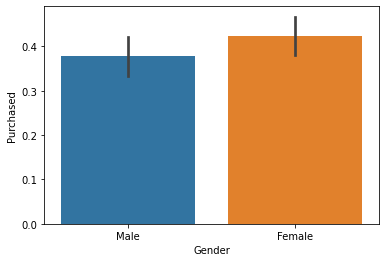

In [6]:
sns.barplot(x="Gender", y="Purchased", data=train_set)

print("Percentage of male who purchased:", train_set["Purchased"][train_set["Gender"] == 'Male'].value_counts(normalize = True)[1]*100)

print("Percentage of female who purchased:", train_set["Purchased"][train_set["Gender"] == 'Female'].value_counts(normalize = True)[1]*100)

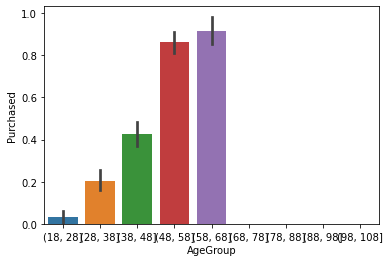

In [7]:
train_set["Age"] = train_set["Age"].fillna(-0.5)
bins = [18, 28, 38, 48, 58, 68, 78, 88, 98, 108]
train_set['AgeGroup'] = pd.cut(train_set["Age"], bins)
sns.barplot(x="AgeGroup", y="Purchased", data=train_set)
plt.show()

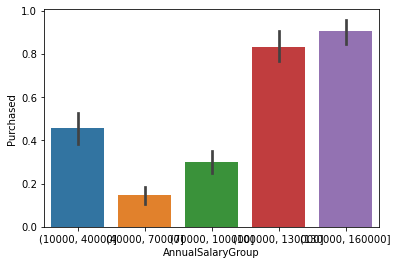

In [8]:
train_set["AnnualSalary"] = train_set["AnnualSalary"].fillna(-0.5)
bins = [10000, 40000, 70000, 100000, 130000, 160000]
train_set['AnnualSalaryGroup'] = pd.cut(train_set["AnnualSalary"], bins)
sns.barplot(x="AnnualSalaryGroup", y="Purchased", data=train_set)
plt.show()

In [9]:
train_set = train_set.drop(['User ID'], axis = 1) #removing ID column

In [10]:
train_set = train_set.drop(['AgeGroup'], axis = 1)

In [11]:
train_set = train_set.drop(['AnnualSalaryGroup'], axis = 1)

In [12]:
train_set.sample(5)

,Gender,Age,AnnualSalary,Purchased
913,Female,21,83500,0
930,Male,57,74000,1
703,Male,36,89500,0
224,Male,36,80500,0
620,Female,45,81500,0


In [13]:
train_set['Gender'].replace(to_replace=['Male','Female'], value=[1,2],inplace=True) #converting gender to a numerical value
train_set.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [14]:
Feature = train_set[['Gender','Age','AnnualSalary']] #columns important for prediction
X = Feature
X[0:5]



,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000


In [15]:
y = train_set['Purchased'].values 
y[0:5]

array([0, 0, 0, 1, 0])

In [16]:
#Data Standardization, because it is more important difference between male and female than it is between someone who is 55 and 56 years old
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.        , 0.37777778, 0.03636364],
       [0.        , 0.48888889, 0.20727273],
       [0.        , 0.68888889, 0.42909091],
       [0.        , 0.48888889, 0.67272727],
       [0.        , 0.15555556, 0.46545455]])

In [17]:
import logging
import sys

logger = logging.getLogger()
fhandler = logging.FileHandler(filename='test_log.log', mode='a')
logger.addHandler(fhandler)

formatter = logging.Formatter('%(asctime)s %(message)s',
            "%Y-%m-%d %H:%M:%S")

fhandler.setFormatter(formatter)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
logger.addHandler(consoleHandler)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

test_set_sizes=[0.5, 0.3, 0.2]
samples = 1000

for test_set_size in test_set_sizes:
    accuracy = 0
    for i in range(samples):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_set_size, random_state=None)
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        y_pred = gnb.predict(X_test)
        accuracy = accuracy + accuracy_score(y_test, y_pred)
    accuracy = accuracy / samples
    #print("Model = Naive Bayes, Split = " , int((1-test_set_size)*100), "-" , int(test_set_size*100) , ", Accuracy = " , accuracy)
    logging.info("Model = Naive Bayes, Split =  {} - {} , Accuracy = {:0.3}" .format(int((1-test_set_size)*100), int(test_set_size*100), float(accuracy)))

2022-08-05 22:56:14 Model = Naive Bayes, Split =  50 - 50 , Accuracy = 0.876
2022-08-05 22:56:15 Model = Naive Bayes, Split =  70 - 30 , Accuracy = 0.876
2022-08-05 22:56:15 Model = Naive Bayes, Split =  80 - 20 , Accuracy = 0.876


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

test_set_sizes=[0.5, 0.3, 0.2]
samples = 1 #only once with fixed starting state = 29

for test_set_size in test_set_sizes:
    accuracy = 0
    for i in range(samples):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_set_size, random_state=29)
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        y_pred = gnb.predict(X_test)
        accuracy = accuracy + accuracy_score(y_test, y_pred)
    accuracy = accuracy / samples
    #print("Model = Naive Bayes, Split = " , int((1-test_set_size)*100), "-" , int(test_set_size*100) , ", Accuracy = " , accuracy)
    logging.info("Model = Naive Bayes, Split =  {} - {} , Accuracy = {:0.3}" .format(int((1-test_set_size)*100), int(test_set_size*100), float(accuracy)))

2022-08-05 22:56:15 Model = Naive Bayes, Split =  50 - 50 , Accuracy = 0.86
2022-08-05 22:56:15 Model = Naive Bayes, Split =  70 - 30 , Accuracy = 0.867
2022-08-05 22:56:15 Model = Naive Bayes, Split =  80 - 20 , Accuracy = 0.86


In [20]:
accuracy_test = 0
accuracy_train = 0
samples = 1000

for i in range(samples):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_set_size, random_state=None) #to not depend on the random state
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    y_pred_test = gnb.predict(X_test) #based on model from train data predict Purchesed for test data
    y_pred_train = gnb.predict(X_train) #based on model from train data predict Purchesed for train data
    
    accuracy_test = accuracy_test + accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_train + accuracy_score(y_train, y_pred_train)
    
accuracy_test = accuracy_test / samples
accuracy_train = accuracy_train  / samples

print('Training set score: ' , accuracy_train)
print('Test set score: ' , accuracy_test)

Training set score:  0.8787799999999995
Test set score:  0.8764999999999991


In [21]:
#These two values are quite close to each other and it means that there is no overfitting